In [1]:
x = 0.2
w = 0.5
b = 1
y = 1
alpha = 0.9

In [2]:
for i in range(10):
    forward = w*x + b
    act = 1/(1+(2.718281828)**(-forward))
    print("y_pred", act)
    error = (1-act)**2
    print("error", error)
    d_error = 2*(y-act)*(-1)
    d_pred = act*(1-act)
    d_w = x
    w = w - alpha*d_error*d_pred*d_w
    print("weight", w)

y_pred 0.7502601055603118
error 0.06237001487474663
weight 0.5168457442197413
y_pred 0.7508908501558424
error 0.06205536853607894
weight 0.5336205952569858
y_pred 0.7515178816390268
error 0.06174336314515671
weight 0.5503250421883881
y_pred 0.7521412307882454
error 0.061433969475165856
weight 0.5669595698971612
y_pred 0.7527609280828104
error 0.061127158682473266
weight 0.5835246591094794
y_pred 0.7533770037058107
error 0.060822902301123694
weight 0.6000207864307117
y_pred 0.7539894875469426
error 0.060521172237415904
weight 0.6164484243814823
y_pred 0.7545984092053265
error 0.06022194076455638
weight 0.6328080414335513
y_pred 0.755203797992309
error 0.05992518051739028
weight 0.6491001020455102
y_pred 0.75580568293425
error 0.05963086448720804
weight 0.6653250666982872


In [3]:
x = 0.2
w = 0.5
#b = 1
y = 1
alpha = 0.9

In [4]:
for i in range(10):
    forward = w*x
    act = 1/(1+(2.718281828)**(-forward))
    print("y_pred", act)
    error = (1-act)**2
    print("error", error)
    d_error = 2*(y-act)*(-1)
    d_pred = act*(1-act)
    d_w = x
    w = w - alpha*d_error*d_pred*d_w
    print("weight", w)

y_pred 0.5249791874747287
error 0.22564477233216892
weight 0.5426451713252703
y_pred 0.5271056583342347
error 0.22362905837949754
weight 0.5850805824595948
y_pred 0.5292206940342155
error 0.22163315492562577
weight 0.6273060092050585
y_pred 0.5313242229514563
error 0.21965698399205622
weight 0.6693212766858169
y_pred 0.5334161782384444
error 0.21770046272961904
weight 0.7111262582646076
y_pred 0.5354964977413241
error 0.2157635036105757
weight 0.7527208744531976
y_pred 0.5375651239159575
error 0.2138460146188638
weight 0.7941050918183059
y_pred 0.5396220037422857
error 0.21194789943826794
weight 0.8352789218844907
y_pred 0.541667088637174
error 0.21006905763832406
weight 0.8762424200354247
y_pred 0.5437003343659215
error 0.20820938485777188
weight 0.9169956844149304


# Neural Networks

In [28]:
import tensorflow as tf

# for reproducibility 
from numpy.random import seed
# seed(1)
# tf.random.set_seed(1)

# plotting 
import matplotlib.pyplot as plt

In [29]:
# load dataset
from tensorflow.keras.datasets import f
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [30]:
# shape of train and test image
print(f'Number of training examples{train_images.shape}')
print(f'Number of test examples{test_images.shape}')

Number of training examples(60000, 28, 28)
Number of test examples(10000, 28, 28)


In [31]:
import numpy as np 

# The labels are an array of integers, in the range [0, 9]. 
# These correspond to the class of clothing item the image represents:
labels = np.unique(test_labels)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


In [32]:
# let's map each images labels to item name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [33]:
print('label value \t\t category')
for class_name, label in zip(class_names, labels):
    print (f'{label} \t\t {class_name}')

label value 		 category
0 		 T-shirt/top
1 		 Trouser
2 		 Pullover
3 		 Dress
4 		 Coat
5 		 Sandal
6 		 Shirt
7 		 Sneaker
8 		 Bag
9 		 Ankle boot


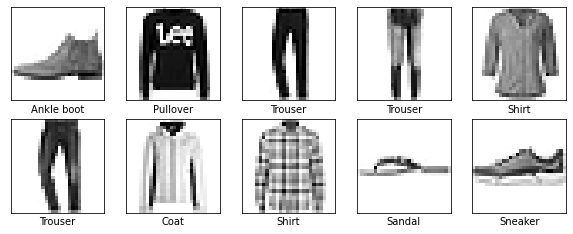

In [34]:
# Visualizing some images
plt.figure(figsize=(10,10))
i = 0
for (image, label) in zip(test_images[:10],test_labels[:10]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

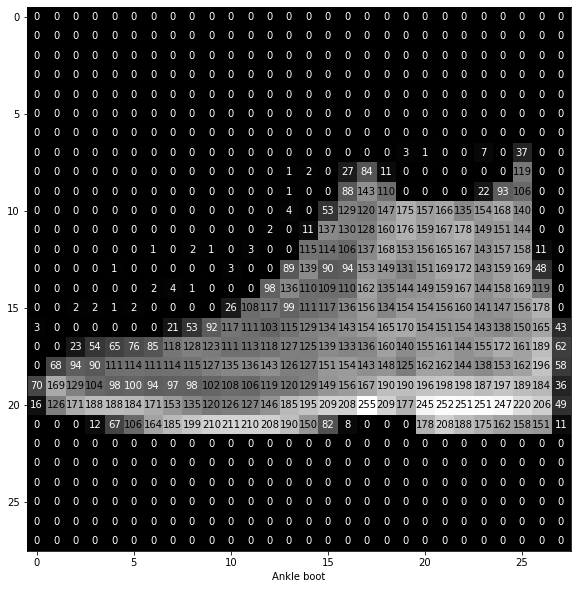

In [35]:
img = np.squeeze(test_images[:1]) # select the image to visualize
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = (img[x][y])
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')
ax.set_xlabel(class_names[9]);

In [38]:
# define model architecture
model = tf.keras.Sequential(
        [
        tf.keras.layers.Input(shape=(784,)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),#activation
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])#sigmoid

In [39]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
train_images.shape

(60000, 28, 28)

In [42]:
# reshape the training and test images
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Normalize data to have feature values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [43]:
train_images.shape

(60000, 784)

In [18]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels_int = np.copy(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [19]:
History = model.fit(train_images, train_labels, validation_split=0.2, epochs=2)


Epoch 1/2
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7345 - accuracy: 0.7335 - val_loss: 1.6806 - val_accuracy: 0.7821
Epoch 2/2
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6788 - accuracy: 0.7838 - val_loss: 1.6789 - val_accuracy: 0.7828


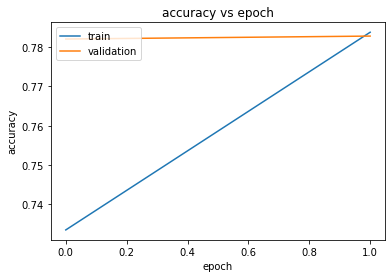

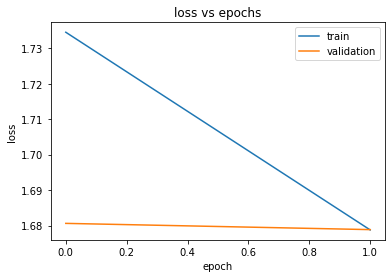

In [20]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('loss vs epochs')# Let's plot the 


plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 715us/step - loss: 1.6857 - accuracy: 0.7753


In [22]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.7753000259399414


In [23]:
predicted_classes = np.argmax(model.predict(test_images.reshape(-1,28*28)),axis=1)

#get true test_label
y_true=test_labels_int

# get the indices of correctly and incorrectly predicted test data points
correct_indices=np.nonzero(predicted_classes==y_true)[0]


incorrect_indices=np.nonzero(predicted_classes!=y_true)[0]

313/313 [==============================] - 0s 603us/step


In [24]:

def plot_image(i, true_labels, images):
    
    ''' function to plot prediction result along with class probability
    
    arguments :
    
     i : test image index
     true_labels : true class label of test set images
     images : test set images
    
    '''
    img=(images[i])
    img=np.array([img])
    predictions_array=model.predict([img])
    true_label=true_labels[i].argmax()
    fig, (ax1,ax2) = plt.subplots(figsize=(6,9),ncols=2)
    ax1.grid(False)
    ax1.set_xticks([])
    ax1.set_yticks([])
  
    ax1.imshow(img.reshape(28,28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    ax1.set_xlabel("Predicted : {} {:2.0f}% \n True label:({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
 
    ax2.barh(np.arange(10), predictions_array.squeeze())
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(class_names, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    print(predictions_array)
    plt.tight_layout()
    

1/1 [==============================] - 0s 28ms/step
[[2.9156736e-11 1.0000000e+00 8.2016532e-15 1.0174843e-09 2.6330788e-32
  1.1097337e-19 3.3179966e-20 3.5073281e-18 1.2764293e-18 7.2190673e-24]]


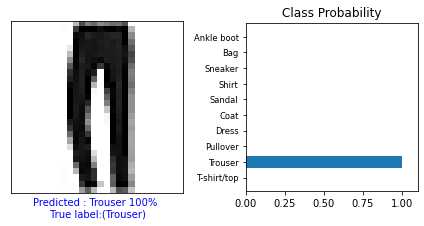

In [25]:
plot_image(correct_indices[2],test_labels, test_images)


In [26]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [27]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
